In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [11]:
X = df.drop('Rings',axis=1)
X.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [13]:
y = df['Rings']
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [15]:
Y = pd.get_dummies(y).values

In [17]:
X = X.values

In [19]:
X

array([[0, 'M', 0.455, ..., 0.2245, 0.101, 0.15],
       [1, 'M', 0.35, ..., 0.0995, 0.0485, 0.07],
       [2, 'F', 0.53, ..., 0.2565, 0.1415, 0.21],
       ...,
       [4174, 'M', 0.6, ..., 0.5255, 0.2875, 0.308],
       [4175, 'F', 0.625, ..., 0.531, 0.261, 0.296],
       [4176, 'M', 0.71, ..., 0.9455, 0.3765, 0.495]], dtype=object)

In [67]:
df = pd.read_csv('abalone.csv')

column_to_encode = 'Sex'
X = df[[column_to_encode]]

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out([column_to_encode]))

df = df.drop(columns=[column_to_encode])
df = pd.concat([df, encoded_df], axis=1)
X = df

print(X.head())

   id  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  Sex_F  Sex_I  Sex_M  
0         0.150     15    0.0    0.0    1.0  
1         0.070      7    0.0    0.0    1.0  
2         0.210      9    1.0    0.0    0.0  
3         0.155     10    0.0    0.0    1.0  
4         0.055      7    0.0    1.0    0.0  


In [31]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [73]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((3341, 12), (3341, 28), (836, 12), (836, 28))

In [75]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(12,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

C:\Users\calix\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,335 (5.21 KB)

 Trainable params: 1,335 (5.21 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0402 - mse: 0.0402 - val_loss: 0.0373 - val_mse: 0.0373
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 0.0372 - mse: 0.0372 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 0.0365 - mse: 0.0365 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - loss: 0.0361 - mse: 0.0361 - val_loss: 0.0359 - val_mse: 0.0359
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 0.0358 - mse: 0.0358 - val_loss: 0.0355 - val_mse: 0.0355
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 0.0355 - mse: 0.0355 - val_loss: 0.0354 - val_mse: 0.0354
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 0.0354 - mse: 0.0354 - val_loss: 0.0354 - val_mse: 0.0354
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 0.0353 - mse: 0.0353 - val_loss: 0.0353 - val_mse: 0.0353
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s

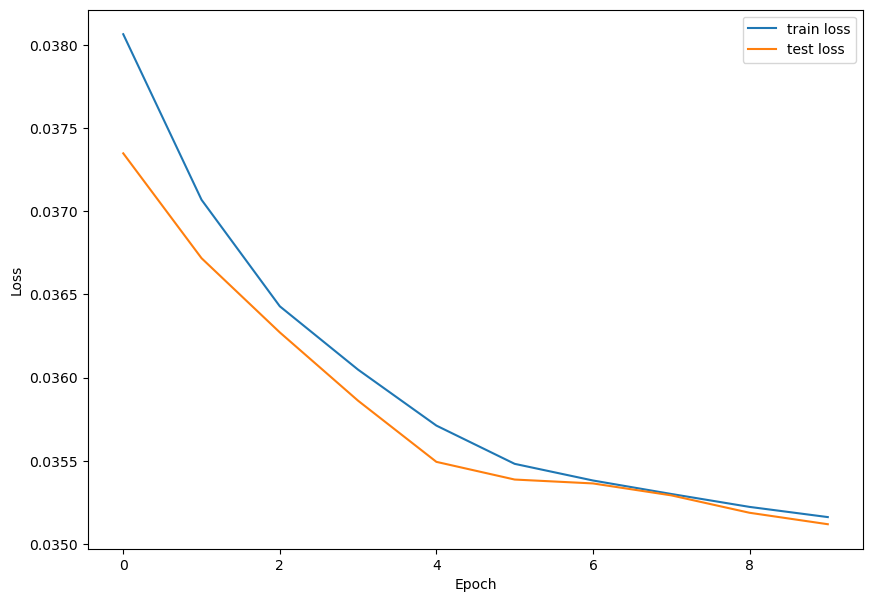

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [81]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 0.0351 - mse: 0.0351


[0.03512004017829895, 0.03512004017829895]